# Option A EDA

--- Data Head ---
  order_date    sku_id   location  quantity
0 2025-04-08  mango123     Mumbai        58
1 2025-04-08  mango123      Delhi        33
2 2025-04-08  mango123  Bangalore        25
3 2025-04-08  apple456     Mumbai        73
4 2025-04-08  apple456      Delhi        87

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_date  540 non-null    datetime64[ns]
 1   sku_id      540 non-null    object        
 2   location    540 non-null    object        
 3   quantity    540 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 17.0+ KB

Generating plots for locations: ['Mumbai' 'Delhi' 'Bangalore']...


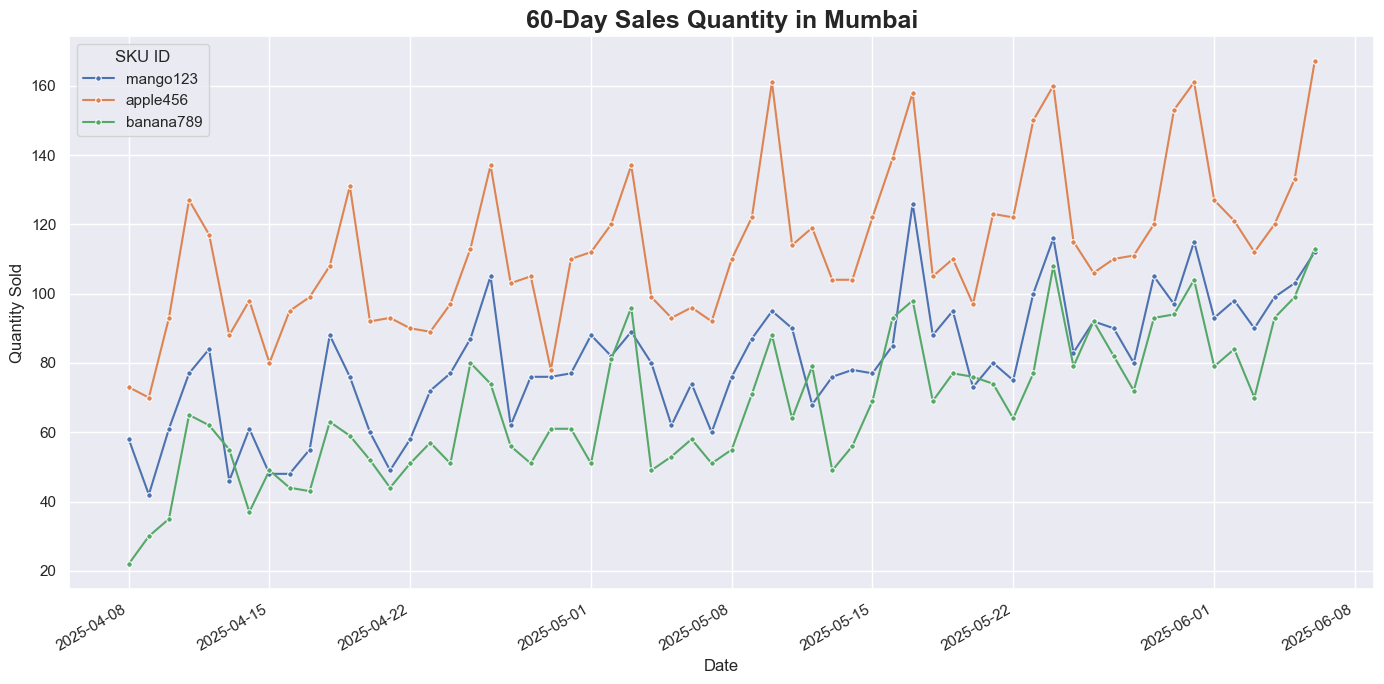

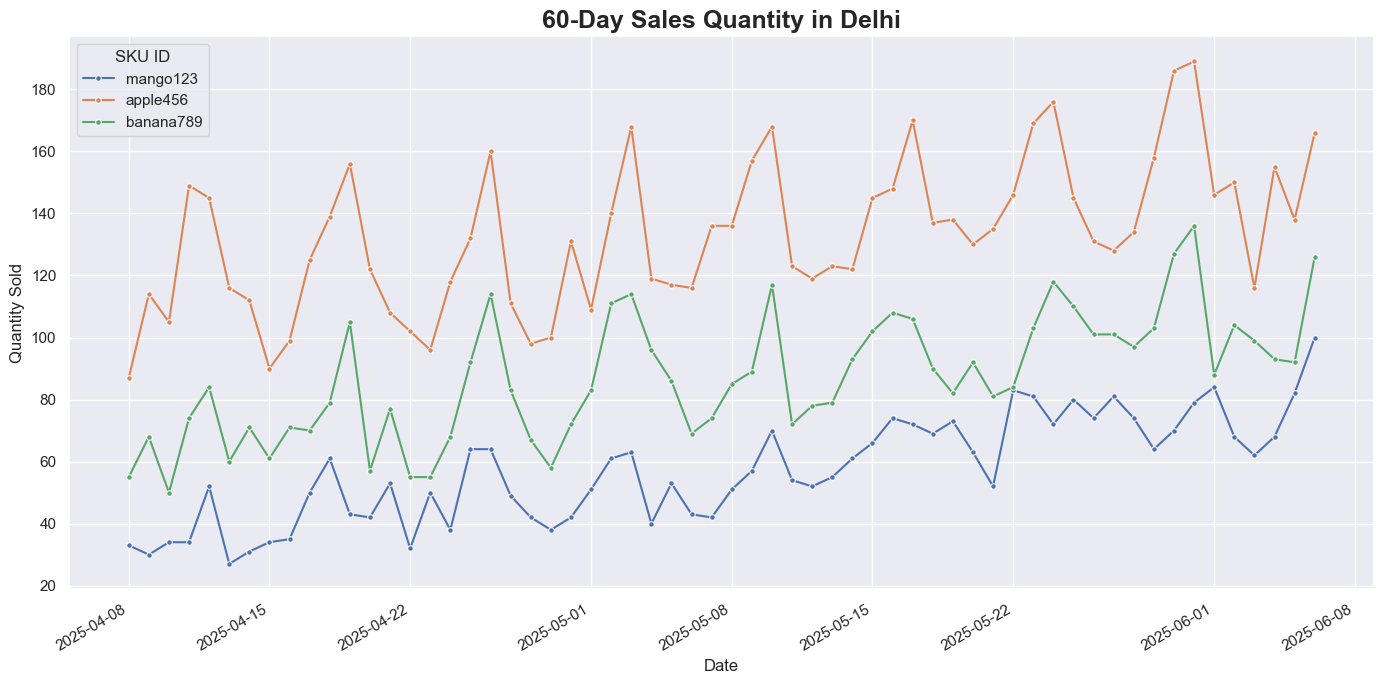

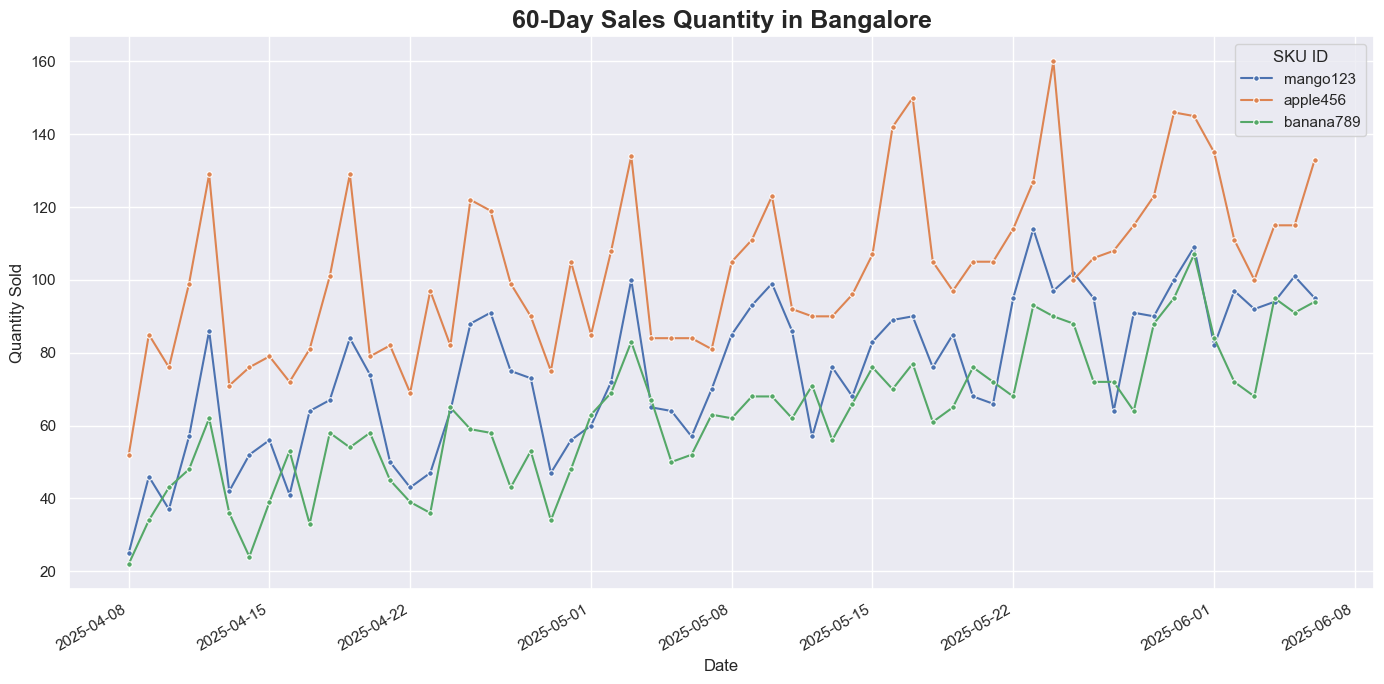


All plots generated.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set a nice visual style for the plots
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (14, 7) # Set a default figure size for better readability

# Define the path to your CSV file
file_path = 'src/training/data/synthetic_demand_data.csv'

# Load the dataset
try:
    df = pd.read_csv(file_path)

    # --- CRITICAL STEP ---
    # Convert the 'order_date' column from a string to a datetime object.
    # This is essential for pandas and matplotlib to understand the time series correctly.
    df['order_date'] = pd.to_datetime(df['order_date'])

    # Display the first few rows and data types to confirm it's loaded correctly
    print("--- Data Head ---")
    print(df.head())
    print("\n--- Data Info ---")
    df.info()

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please make sure it's in the same directory as the notebook.")

# Get a list of the unique locations in the dataset
locations = df['location'].unique()

print(f"\nGenerating plots for locations: {locations}...")

# Loop through each location and create a separate plot
for location in locations:
    
    # Filter the DataFrame to get data only for the current location
    location_df = df[df['location'] == location]
    
    # --- Create the Plot ---
    # The `hue` parameter in seaborn automatically creates separate colored lines for each 'sku_id'
    sns.lineplot(data=location_df, x='order_date', y='quantity', hue='sku_id', marker='o', markersize=4, linestyle='-')
    
    # --- Customize the Plot for Clarity ---
    plt.title(f'60-Day Sales Quantity in {location}', fontsize=18, weight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Quantity Sold', fontsize=12)
    
    # Improve the readability of the date labels on the x-axis
    plt.xticks(rotation=30, ha='right')
    
    plt.legend(title='SKU ID')
    plt.tight_layout() # Adjusts plot to ensure everything fits without overlapping
    
    # Display the plot for the current location
    plt.show()

print("\nAll plots generated.")

--- Historical Data Head ---
  order_date    sku_id   location  quantity
0 2025-04-08  mango123     Mumbai        58
1 2025-04-08  mango123      Delhi        33
2 2025-04-08  mango123  Bangalore        25
3 2025-04-08  apple456     Mumbai        73
4 2025-04-08  apple456      Delhi        87

--- Historical Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_date  540 non-null    datetime64[ns]
 1   sku_id      540 non-null    object        
 2   location    540 non-null    object        
 3   quantity    540 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 17.0+ KB

--- Forecast Data Loaded Successfully ---

Generating plots for locations: ['Mumbai', 'Delhi', 'Bangalore']...


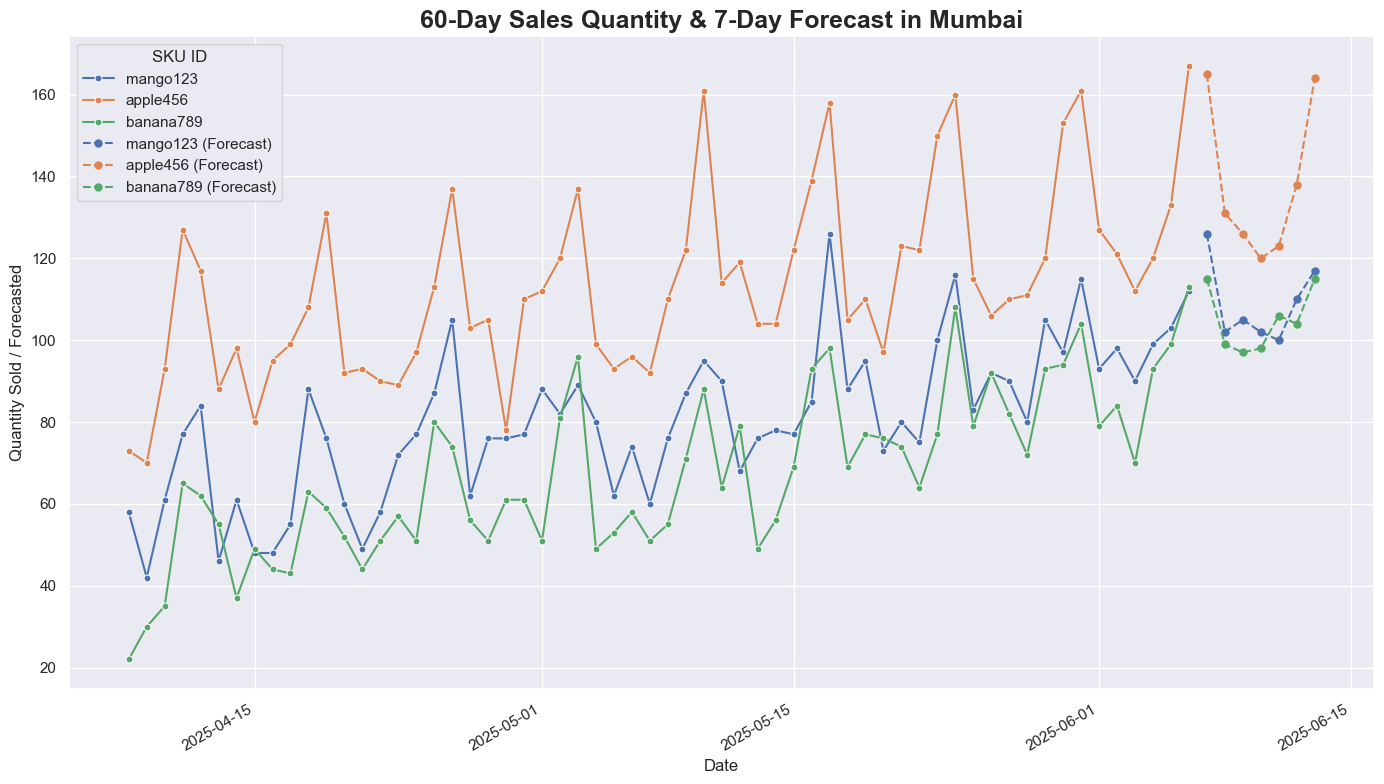

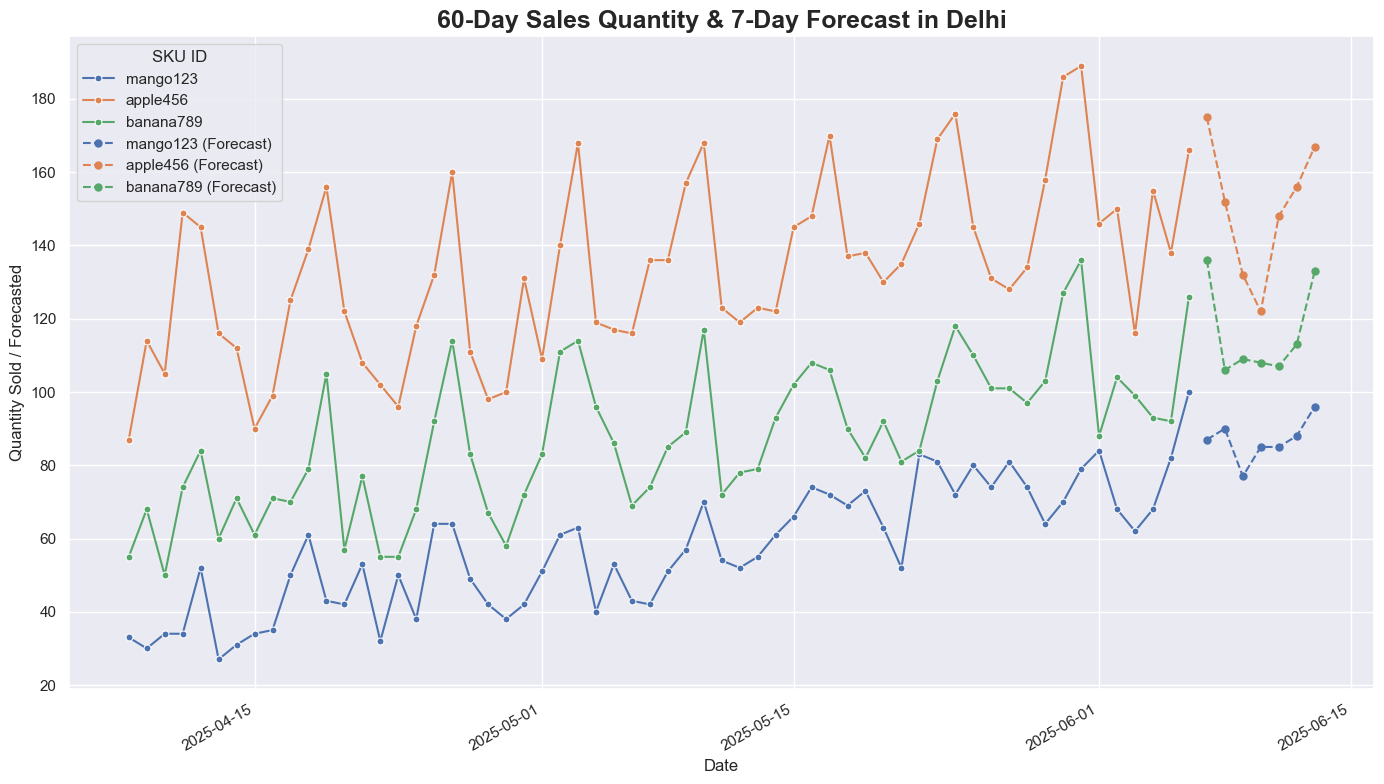

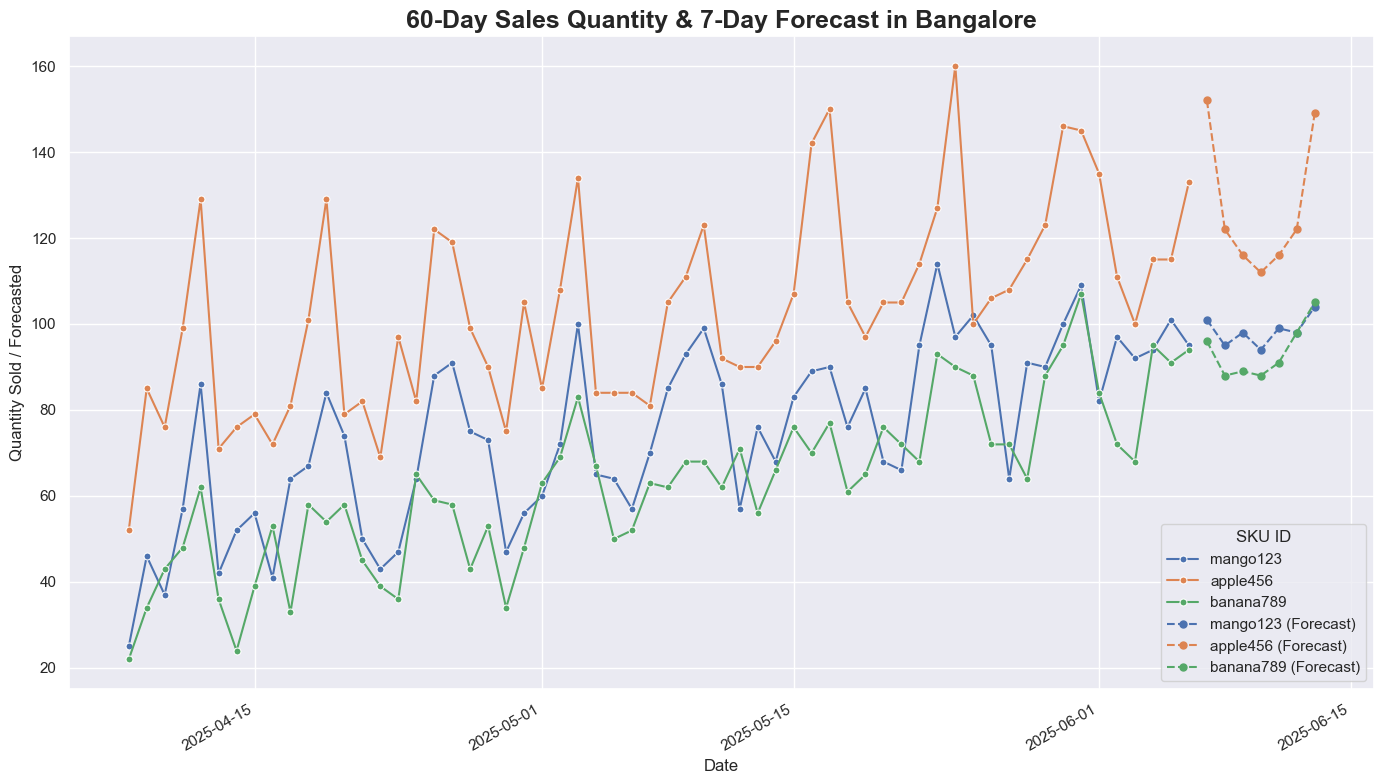


All plots generated.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import timedelta

# --- Configuration ---
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (14, 8) # Made the figure a bit taller for clarity
HISTORICAL_DATA_PATH = 'src/training/data/synthetic_demand_data.csv'
FORECAST_DATA_PATH = 'src/training/forecast_output.json'

# --- 1. Load Historical Data ---
try:
    df = pd.read_csv(HISTORICAL_DATA_PATH)
    # Convert 'order_date' to datetime objects
    df['order_date'] = pd.to_datetime(df['order_date'])
    print("--- Historical Data Head ---")
    print(df.head())
    print("\n--- Historical Data Info ---")
    df.info()
except FileNotFoundError:
    print(f"Error: The historical data file '{HISTORICAL_DATA_PATH}' was not found.")
    exit() # Exit if we can't load the main data

# --- 2. Load Forecast Data ---
try:
    with open(FORECAST_DATA_PATH, 'r') as f:
        forecast_data = json.load(f)
    print("\n--- Forecast Data Loaded Successfully ---")
    # Optional: print first forecast entry to verify
    # print(forecast_data[0])
except FileNotFoundError:
    print(f"Error: The forecast file '{FORECAST_DATA_PATH}' was not found.")
    forecast_data = [] # Continue without forecasts if file is missing
except json.JSONDecodeError:
    print(f"Error: Could not decode the JSON from '{FORECAST_DATA_PATH}'. Please check its format.")
    forecast_data = []

# --- 3. Generate Plots with Forecasts ---
locations = df['location'].unique()
print(f"\nGenerating plots for locations: {list(locations)}...")

# Loop through each location to create a separate plot
for location in locations:
    
    # Filter the DataFrame for the current location
    location_df = df[df['location'] == location]
    
    # --- Create the Base Plot with Historical Data ---
    # The `hue` parameter automatically creates separate colored lines for each 'sku_id'
    # We store the returned Axes object `ax` to draw the forecast on it.
    ax = sns.lineplot(data=location_df, x='order_date', y='quantity', hue='sku_id', marker='o', markersize=5, linestyle='-')
    
    # --- Overlay Forecast Data onto the Plot ---
    # Get the current color palette to match forecast lines with historical lines
    palette = sns.color_palette()
    sku_list = location_df['sku_id'].unique()
    
    # Loop through each SKU in the current location to find and plot its forecast
    for i, sku in enumerate(sku_list):
        
        # Find the specific forecast for the current location and SKU
        forecast_entry = next((item for item in forecast_data if item['location'] == location and item['sku_id'] == sku), None)
        
        if forecast_entry:
            # Get the list of forecast values
            forecast_values = forecast_entry['forecast_next_7_days']
            
            # Find the last date in the historical data for this specific SKU
            last_historical_date = location_df[location_df['sku_id'] == sku]['order_date'].max()
            
            # Generate the date range for the next 7 days
            forecast_dates = pd.date_range(start=last_historical_date + timedelta(days=1), periods=7)
            
            # Get the color used by seaborn for this SKU
            sku_color = palette[i % len(palette)] # Use modulo in case of more SKUs than colors
            
            # Plot the forecast data with a dotted line
            ax.plot(forecast_dates, forecast_values, 
                    linestyle='--', 
                    marker='o', 
                    markersize=5,
                    color=sku_color, 
                    label=f'{sku} (Forecast)') # Optional: Add a specific forecast label

    # --- Customize the Plot for Clarity ---
    plt.title(f'60-Day Sales Quantity & 7-Day Forecast in {location}', fontsize=18, weight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Quantity Sold / Forecasted', fontsize=12)
    
    # Improve readability of date labels
    plt.xticks(rotation=30, ha='right')
    
    # Recreate the legend to be clean. The original one might get messy.
    handles, labels = ax.get_legend_handles_labels()
    # This simple logic keeps the main SKU IDs and removes duplicates if any
    unique_labels = dict(zip(labels, handles))
    plt.legend(unique_labels.values(), unique_labels.keys(), title='SKU ID')

    plt.tight_layout() # Adjust plot to ensure everything fits
    
    # Display the final plot for the current location
    plt.show()

print("\nAll plots generated.")

# Option B EDA

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('src/training/data/spoilage_data.csv')

# --- Exploration ---
# See the first 5 rows
print("--- Head ---")
print(df.head())

# Check for missing values and data types
print("\n--- Info ---")
df.info()

# Get a statistical summary of numerical columns
print("\n--- Description ---")
print(df.describe())

# Check the balance of our target variable (very important!)
print("\n--- Spoilage Counts ---")
print(df['spoilage_flag'].value_counts(normalize=True)) 

from sklearn.model_selection import train_test_split

# Place this code after you load the df, before you define X and y

print("--- Performing Feature Engineering ---")

# Interaction feature
df['temp_x_hours'] = df['avg_temp'] * df['transit_hours']

# Non-linear temperature features
df['temp_squared'] = df['avg_temp']**2
df['is_hot'] = (df['avg_temp'] > 20).astype(int)

print("New features created:", ['temp_x_hours', 'temp_squared', 'is_hot'])
print(df.head())

# 1. Define features (X) and target (y)
# We drop the ID, and also the target variable from our features
X = df.drop(columns=['shipment_id', 'spoilage_flag']) 
y = df['spoilage_flag']

# 2. One-Hot Encode the 'sku_id' feature
# This is the most critical preprocessing step here
X_encoded = pd.get_dummies(X, columns=['sku_id'], prefix='sku')

# Display the new encoded columns
print("\n--- Encoded Features (first 5 rows) ---")
print(X_encoded.head())

# 3. Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)
# 'stratify=y' ensures the train and test sets have a similar proportion of spoiled/not-spoiled items.

from sklearn.ensemble import RandomForestClassifier

# Initialize the model with some standard parameters
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

# Train the model on the training data
print("\n--- Training the model... ---")
model.fit(X_train, y_train)
print("Model training complete.")

from sklearn.metrics import accuracy_score, roc_auc_score

# 1. Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Get probabilities for the "spoiled" class

# 2. Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\n--- Model Performance ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# 3. Display feature importances
print("\n--- Feature Importances ---")
importances = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
print(importances)

--- Head ---
  shipment_id        sku_id  transit_hours  avg_temp  shock_events  \
0     SHP-001      banana78           12.6      20.2             6   
1     SHP-002    apple_gala          101.1      20.2             8   
2     SHP-003  cheese_block          113.1      29.5             6   
3     SHP-004  strawberry45          118.2       3.5             6   
4     SHP-005    apple_gala           20.3       3.5             6   

   spoilage_flag  
0              1  
1              0  
2              1  
3              1  
4              1  

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   shipment_id    500 non-null    object 
 1   sku_id         500 non-null    object 
 2   transit_hours  500 non-null    float64
 3   avg_temp       500 non-null    float64
 4   shock_events   500 non-null    int64  
 5   spoilage_flag  500 no